
## spill break ##
[1454.4, 2868.4, 2658.4, 6814.2, 214.6, 1458.4, 197692.8, 1212.2, 0.0, 0.0]


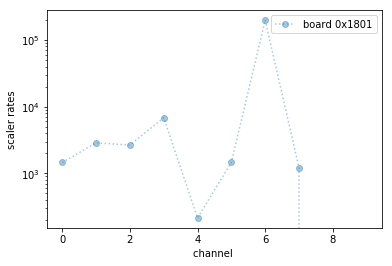


## spill break ##
[1966738.4, 1964316.2, 1950150.6, 2142236.8, 1556822.8, 1400899.6, 1902492.2, 1917510.6, 2564714.0, 2718206.6]


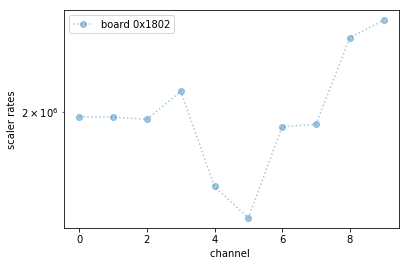

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
from fst import *
import tdc_daq as td
number_of_TDC_channels = 10
tdc_channels = list(range(0, number_of_TDC_channels))

measure_board_list =  [  "0x1801","0x1802" ]
spillbreak_rate_scintillator = 3000


for b in range(0,len(measure_board_list)):


    name = measure_board_list[b]
    wait_for_spill_break(threshold_rate=spillbreak_rate_scintillator)
    #wait_for_spill(threshold_rate=spillbreak_rate_scintillator)
    scaler_rates = td.scaler_rate_of_TDC(name,tdc_channels,5) 
    print(scaler_rates)
    plt.errorbar(range(0,len(scaler_rates)),scaler_rates, yerr=None, xerr=None, fmt='o:', alpha=0.4,label = "board {:s}".format(name))
    plt.xlabel("channel ")
    plt.ylabel("scaler rates")  
    plt.legend()
    plt.yscale('log')
    plt.show()

set TDC spike rejection  0

## spill start ##
[3286555.4, 3164765.8, 3164025.8, 3159782.8, 2465004.4, 3102592.6, 7315645.2, 3576621.8, 2.4, 8.6]
set TDC spike rejection  1

## spill start ##
[3064914.8, 3038897.4, 3004145.2, 2994222.8, 2338214.6, 2918228.4, 6788436.4, 3338257.6, 4.0, 12.0]
set TDC spike rejection  2

## spill start ##
[2928098.4, 3150242.2, 3268739.8, 3176456.0, 2579903.0, 3054260.8, 7259647.6, 3253819.2, 2.6, 13.0]
set TDC spike rejection  3

## spill start ##
[1846295.8, 2253818.2, 2229341.0, 2364114.0, 1800882.8, 2251928.6, 5704810.2, 2109396.4, 1.6, 8.8]
set TDC spike rejection  4

## spill start ##
[328780.0, 821640.6, 461591.8, 841681.2, 228572.6, 662724.8, 3786820.2, 512305.0, 0.0, 0.0]
set TDC spike rejection  5
br br br br br br br br br br 
## spill start ##
[420029.8, 670331.8, 748991.0, 858521.2, 751576.6, 696440.0, 1871491.4, 402733.0, 0.2, 3.0]
set TDC spike rejection  6

## spill start ##
[594779.6, 845766.2, 959507.8, 1022413.0, 959477.8, 879436.8, 1238

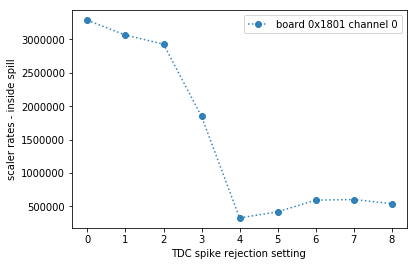

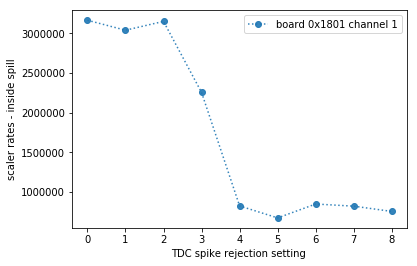

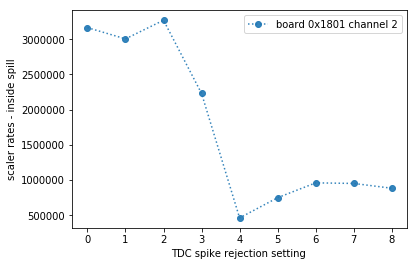

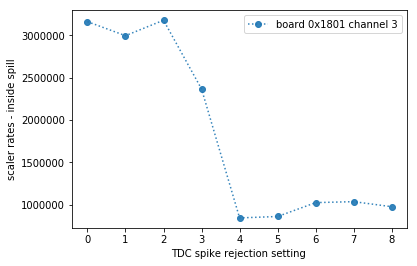

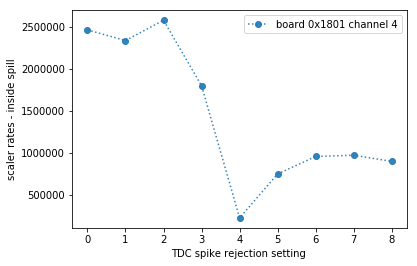

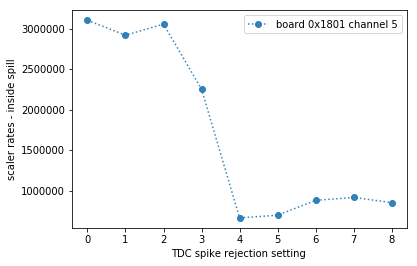

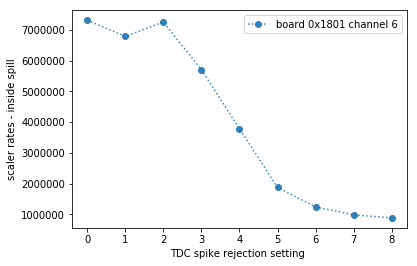

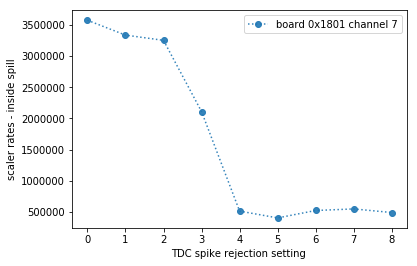

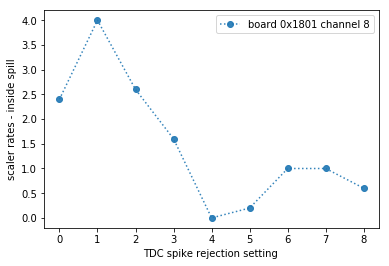

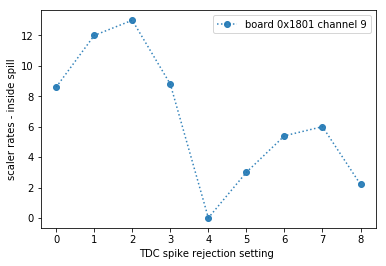

set TDC spike rejection  0

## spill start ##
[3328505.2, 3173744.8, 3159511.6, 3355554.4, 2879590.0, 2712908.4, 3183421.6, 3338009.4, 3869517.2, 4220255.8]
set TDC spike rejection  1

## spill start ##
[2105452.8, 2048803.4, 2046625.8, 2222323.2, 1723927.2, 1567268.6, 2013688.0, 2068716.6, 2659988.4, 2852918.0]
set TDC spike rejection  2
br br br br br br br br br br br br br br 
## spill start ##
[2250441.8, 2165592.2, 2167031.0, 2328253.2, 1918359.6, 1760145.6, 2136554.0, 2216312.0, 2747969.2, 2976681.2]
set TDC spike rejection  3

## spill start ##
[3698973.2, 3505781.0, 3479201.0, 3692640.2, 3188927.0, 3011531.2, 3505778.0, 3687324.0, 4306808.0, 4680841.2]
set TDC spike rejection  4

## spill start ##
[2413630.0, 2277372.0, 2255350.0, 2384686.2, 2088242.4, 1975979.8, 2297182.4, 2435898.8, 2782601.0, 3045882.0]
set TDC spike rejection  5

## spill start ##
[2369116.2, 2243953.8, 2233002.0, 2364894.8, 2056390.2, 1942594.0, 2261084.0, 2379352.0, 2737179.0, 3002136.8]
set TDC spike re

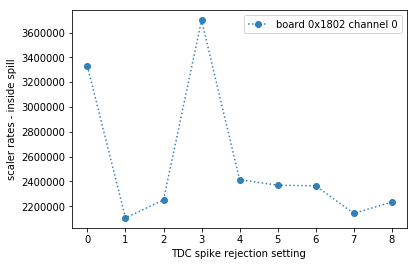

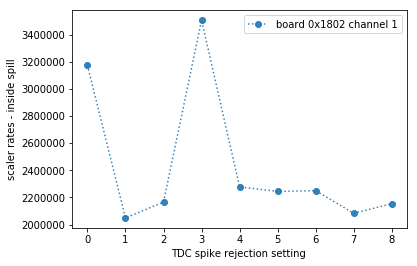

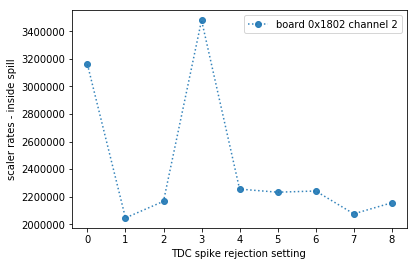

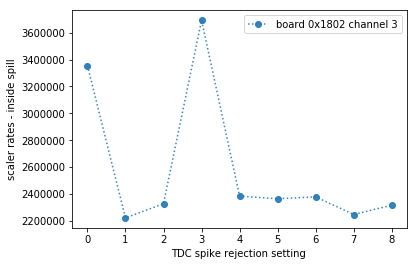

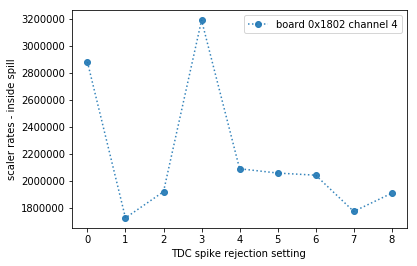

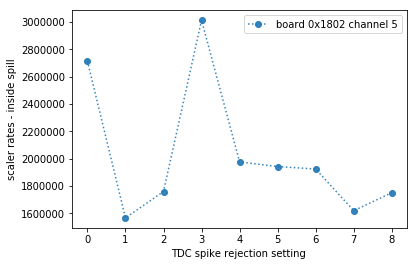

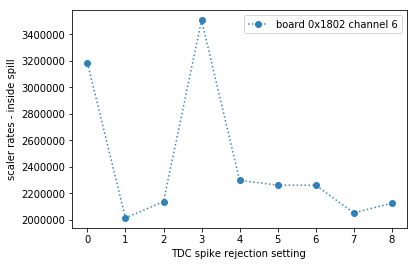

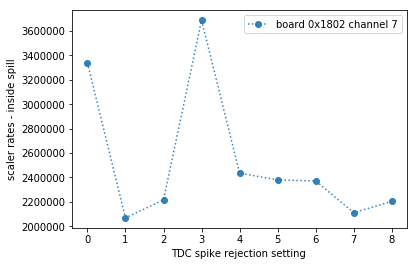

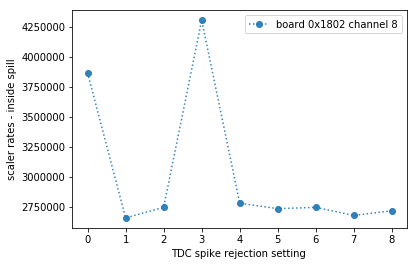

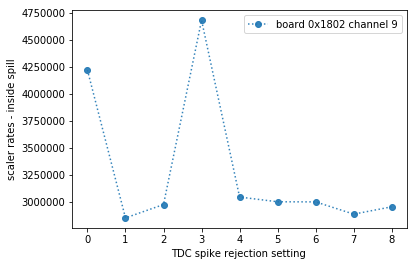

In [8]:

spike_reject_list_TDC = [0,1,2,3,4,5,6,7,8]
#spike_reject_list_TDC = [8,5,2,0]
trend_scan_Nsteps =len(spike_reject_list_TDC)
measure_time=10
# measure_board_list =  [ "0902", "0905"]  
#measure_board_list =  [ "0902"           ]  
measure_board_list =  [  "0x1801","0x1802" ]


from matplotlib import pyplot as plt
%matplotlib inline

from fst import *
from my_utils import *
from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import time
import db
from cw_pasttrec_functions import *

from my_utils import *

set_width_max_of_jupyterpad()


for b in range(0,len(measure_board_list)):

    average_scaler_list        =  [[ []  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
    average_scaler_list_err    =  [[ []  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
    #ptc.init_active_boards(pt_pktime,pt_gain,pt_threshold_default) 
    # get scaler rates for chosen threshold/gain/peaking time as simple estimate of noise:
    scaler_list_trend        =  [ []  for i in range(trend_scan_Nsteps) ] 

    scaler_list_trend_channel = [ []  for i in range(16)] 
    name = measure_board_list[b]
    for p in range(0,trend_scan_Nsteps):
             #setTDC spike rejection to ~50ns 
            print("set TDC spike rejection ", spike_reject_list_TDC[p])
            os.system("trbcmd loadbit 0x1801 0xd580 0xf0000000 0x{:d}0000000".format(spike_reject_list_TDC[p]))
            #wait_for_spill_break(threshold_rate=spillbreak_rate_scintillator)
            wait_for_spill(threshold_rate=spillbreak_rate_scintillator)
            #scaler_rates = td.scaler_rate_of_board(name,measure_time) 
            scaler_rates = td.scaler_rate_of_TDC(name,tdc_channels,5) 
            print(scaler_rates)            
            #scaler_rates = td.scaler_rate("0x0350",[48,49],1)

            for ch in range(0,len(scaler_rates)):
                    scaler_list_trend_channel[ch] += [ scaler_rates[ch] ]
                
#  plt.show()
#  plt.legend()
# scaler_rates = td.scaler_rate_of_board(name,measure_time) 
    for ch in range(0,len(scaler_rates)):
        if scaler_list_trend_channel[ch]:
                plt.errorbar(range(0,len(scaler_list_trend_channel[ch])),scaler_list_trend_channel[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "board {:s} channel {:d}".format(name,ch))
                plt.xlabel("TDC spike rejection setting ")
                plt.ylabel("scaler rates - inside spill")  
        plt.legend()
        plt.show()

In [10]:
trend_scan_Nsteps = 5
measure_time=1
# measure_board_list =  [ "0902", "0905"]  
measure_board_list =  [ "0902"]
channellist = [48,49]


from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import ROOT
import db
from cw_pasttrec_functions import *

from my_utils import *

set_width_max_of_jupyterpad()


average_scaler_list        =  [[ []  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
average_scaler_list_err    =  [[ []  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
#ptc.init_active_boards(pt_pktime,pt_gain,pt_threshold_default) 
# get scaler rates for chosen threshold/gain/peaking time as simple estimate of noise:
scaler_list_trend        =  [ []  for i in range(trend_scan_Nsteps) ] 

scaler_list_trend_channel = [ []  for i in range(16)]
for b in range(0,len(measure_board_list)):
 name = measure_board_list[b]
 for p in range(0,trend_scan_Nsteps):
#             scaler_rates = td.scaler_rate_of_board(name,measure_time) 
            scaler_rates = td.scaler_rate("0x0350",channellist,1)

            print(scaler_rates)
 
            for ch in range(0,len(scaler_rates)):
               if  scaler_rates[ch] < 1E7 :
                scaler_list_trend_channel[ch] += [ scaler_rates[ch] ]

####################
plotting

for ch in range(0,len(scaler_rates)):
                if scaler_list_trend_channel[ch]:
                        plt.errorbar(range(0,len(scaler_list_trend_channel[ch])),scaler_list_trend_channel[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "channel {:d}".format(channellist[ch]))
                        plt.xlabel("trend ")
                        plt.ylabel("scaler rates")  
plt.legend()
plt.show()


[2181354.0, 2144392.0]
[1766921.0, 1691150.0]
[1723018.0, 1635502.0]
[1671228.0, 1585387.0]
[1714080.0, 1622279.0]


NameError: name 'plotting' is not defined